In [26]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as scheduler
from tqdm.notebook import trange, tqdm
from torchsummary import summary


import matplotlib.pyplot as plt
import numpy as np

from LeNet import LeNet

In [27]:
"""Load Cuda """
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True
""""""""""""""""""

''

In [28]:
transform = transforms.Compose(
                                [
                                transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                                ]
                                
                                )

In [29]:
mnist_train_data = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
mnist_test_data  = datasets.MNIST (root = './data', train = False, download = True, transform = transform)

trainLoader = torch.utils.data.DataLoader(mnist_train_data,

                                            batch_size = 256,
                                            shuffle = True,
                                            num_workers = 2)
valLoader   = torch.utils.data.DataLoader(mnist_test_data,
                                            batch_size = 256,
                                            shuffle = True,
                                            num_workers = 2)

loaders = {'train': trainLoader, 'valid': valLoader}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


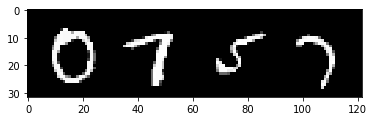

tensor([0, 7, 5, 7])


In [30]:

for _, batch in enumerate(trainLoader):
    images, labels = batch
    images = torchvision.utils.make_grid(images[:4])
    images = images.detach().numpy().transpose((1,2,0))
    plt.imshow(images)
    plt.show()
    print(labels[:4])
    break



In [31]:
if __name__ == '__main__':
    model = LeNet()
    model.to(device)
    summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
              ReLU-2            [-1, 6, 24, 24]               0
         MaxPool2d-3            [-1, 6, 12, 12]               0
            Conv2d-4             [-1, 16, 8, 8]           2,416
              ReLU-5             [-1, 16, 8, 8]               0
         MaxPool2d-6             [-1, 16, 4, 4]               0
            Linear-7                  [-1, 120]          30,840
              ReLU-8                  [-1, 120]               0
            Linear-9                   [-1, 84]          10,164
             ReLU-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

In [32]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-1)

epochs    = 15

train_losses     = []
train_accuracies = []   

val_losses       = []
val_accuracies = []

In [33]:
for epoch in trange(epochs, desc = "Epoch"):
    model.train()
    for step,batch in enumerate(tqdm(trainLoader, total = len(trainLoader), leave = False)):
        images,labels = batch
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        with torch.set_grad_enabled(True):
            preds = model(images)

            loss = criterion(preds, labels.long())

            preds = torch.argmax(preds, dim = 1)
            acc   = (preds == labels).float().mean()

            loss.backward()
            optimizer.step()

            train_losses.append(loss.item())
            train_accuracies.append(acc.item())
    tqdm.write("Epoch: {0} \tLoss: {1:.4f} \tAccuracy: {2:.4f}".format(epoch,(np.sum(train_losses)/len(train_losses)), (np.sum(train_accuracies)/len(train_accuracies))))


Epoch: 0 	Loss: 1.1028 	Accuracy: 0.6481


Epoch: 1 	Loss: 0.6195 	Accuracy: 0.8027


Epoch: 2 	Loss: 0.4427 	Accuracy: 0.8593


Epoch: 3 	Loss: 0.3494 	Accuracy: 0.8890


Epoch: 4 	Loss: 0.2913 	Accuracy: 0.9075


Epoch: 5 	Loss: 0.2511 	Accuracy: 0.9203


Epoch: 6 	Loss: 0.2217 	Accuracy: 0.9296


Epoch: 7 	Loss: 0.1990 	Accuracy: 0.9368


Epoch: 8 	Loss: 0.1810 	Accuracy: 0.9426


Epoch: 9 	Loss: 0.1663 	Accuracy: 0.9472


Epoch: 10 	Loss: 0.1540 	Accuracy: 0.9511


Epoch: 11 	Loss: 0.1435 	Accuracy: 0.9544


Epoch: 12 	Loss: 0.1345 	Accuracy: 0.9573


Epoch: 13 	Loss: 0.1266 	Accuracy: 0.9598


Epoch: 14 	Loss: 0.1196 	Accuracy: 0.9620



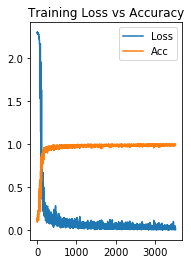

In [34]:
ax1 = plt.subplot(121)
ax1.set_title("Training Loss vs Accuracy")
ax1.plot(train_losses)
ax1.plot(train_accuracies)
ax1.legend(('Loss','Acc'))
plt.show()

In [35]:
model.eval()
corrects = 0
for _, batch in enumerate(valLoader):
    images, labels = batch
    images, labels = images.to(device), labels.to(device)

    preds = model(images)
    preds = torch.argmax(preds, dim = 1)

    corrects  += (preds == labels).float().sum() 
accuracy = (corrects/len(mnist_test_data))*100
print("Accuracy over Test Set: {0:.2f}".format(accuracy))

Accuracy over Test Set: 98.77


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


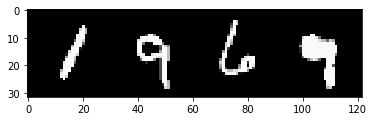

tensor([1, 9, 6, 9], device='cuda:0', grad_fn=<SliceBackward>)


In [40]:
for _, batch in enumerate(valLoader):
    images, labels = batch
    disp_image = images
    images, labels = images.to(device), labels.to(device)
    
    preds = model(images)
    preds = torch.argmax(preds, dim = 1)

    disp_image = torchvision.utils.make_grid(disp_image[:4])
    disp_image = disp_image.detach().numpy().transpose((1,2,0))
    plt.imshow(disp_image)
    plt.show()
    print(preds[:4])
    break